<a href="https://colab.research.google.com/github/satyamgupta011/FASION_MODEL/blob/main/fashion_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
750/750 [==============================] - 100s 132ms/step - loss: 0.4727 - accuracy: 0.8277 - val_loss: 0.3234 - val_accuracy: 0.8832
Epoch 2/10
750/750 [==============================] - 97s 129ms/step - loss: 0.2894 - accuracy: 0.8935 - val_loss: 0.2994 - val_accuracy: 0.8906
Epoch 3/10
750/750 [==============================] - 100s 133ms/step - loss: 0.2438 - accuracy: 0.9098 - val_loss: 0.2532 - val_accuracy: 0.9082
Epoch 4/10
750/750 [==============================] - 96s 128ms/step - loss: 0.2096 - accuracy: 0.9228 - val_loss: 0.2959 - val_accuracy: 0.8974
Epoch 5/10
750/750 [==============================] - 98s 131ms/step - loss: 0.1839 - accuracy: 0.9312 - val_loss: 0.2361 - val_accuracy: 0.9147
Epoch 6/10
750/750 [==============================] - 97s 129ms/step - loss: 0.1619 - accuracy: 0.9400 - val_loss: 0.2186 - val_accuracy: 0.9209
Epoch 7/10
750/750 [==============================] - 96s 128ms/step - loss: 0.1405 - accuracy: 0.9463 - val_loss: 0.2355 - val_

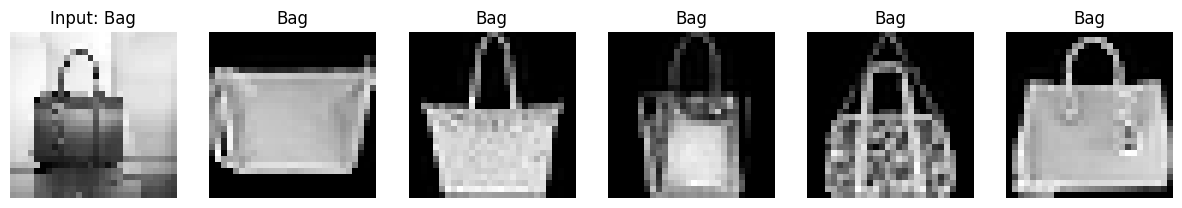

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image

# Load and preprocess the Fashion MNIST dataset
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

# Reshape and normalize the data
train_X = train_X.reshape(-1, 28, 28, 1).astype('float32') / 255.
test_X = test_X.reshape(-1, 28, 28, 1).astype('float32') / 255.

# One-hot encode the labels
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Split the data into training and validation sets
train_X, valid_X, train_label, valid_label = train_test_split(
    train_X, train_Y_one_hot, test_size=0.2, random_state=13)

# Model parameters
batch_size = 64
epochs = 10
num_classes = 10

# Define the CNN model without dropout
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(28, 28, 1), padding='same'))
fashion_model.add(keras.layers.LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2), padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
fashion_model.add(keras.layers.LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
fashion_model.add(keras.layers.LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(keras.layers.LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

# Train the model
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_X, valid_label))

# Evaluate the model on the test set
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

# Define class labels based on Fashion MNIST classes
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Function to generate and display multiple predictions from an input image
def generate_and_display_predictions(input_image_path, num_predictions=5):
    # Load the input image
    img = image.load_img(input_image_path, target_size=(28, 28), color_mode="grayscale")
    img_array = image.img_to_array(img)
    img_array /= 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Use the model to predict the class of the input image
    prediction = fashion_model.predict(img_array)
    predicted_class = np.argmax(prediction)

    # Generate multiple images of the predicted class
    class_indices = np.where(np.argmax(fashion_model.predict(test_X), axis=1) == predicted_class)[0]
    selected_indices = np.random.choice(class_indices, num_predictions, replace=False)

    # Plot the input image and the generated examples
    plt.figure(figsize=(15, 3))

    # Plot the input image
    plt.subplot(1, num_predictions + 1, 1)
    plt.imshow(img_array[0, :, :, 0], cmap='gray')
    plt.title(f"Input: {class_labels[predicted_class]}")
    plt.axis('off')

    # Plot the generated examples
    for i, idx in enumerate(selected_indices):
        plt.subplot(1, num_predictions + 1, i + 2)
        plt.imshow(test_X[idx].reshape(28, 28), cmap='gray')
        plt.title(class_labels[predicted_class])
        plt.axis('off')

    plt.show()

# Example usage: replace 'your_input_image.png' with the path to your input image
input_image_path = '/content/images (1).jpeg'
generate_and_display_predictions(input_image_path, num_predictions=5)

